In [1]:
# Adapted from example on doc pages here: https://scikit-learn.org/stable/modules/tree.html
#   and here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Refer to these pages for more info on the Decision Tree classifier.

In [2]:
# TODO: Change to your name, the assignment name, and due date
'''
Steve Sommer
Lab3: Decision Tree Practice
Due: Due on Oct 13, 2023 11:59 PM
'''
# "I am superior, sir, in many ways, but I would gladly give it up to be human." - Data

'\nSteve Sommer\nLab3: Decision Tree Practice\nDue: Due on Oct 13, 2023 11:59 PM\n'

In [56]:
import math
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [57]:
# TODO: Open the titanic.csv file for reading
fin = open("titanic.csv","r")

In [58]:
# Skip header line
feat_names = fin.readline().strip().split(",")
feat_names = feat_names[1:2] + feat_names[4:]

In [59]:
feat_names

['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']

In [60]:
# TODO: Read all lines into an array of instances. Skip the name and gender features.
all_inst = []
for line in fin:
    all_feat = line.strip().split(",")
    feat_no_name_gender = all_feat[:2] + all_feat[4:]
    all_inst.append(feat_no_name_gender)


In [61]:
print(all_inst[0])

['0', '3', '22', '1', '0', '7.25']


In [62]:
len(all_inst)

887

In [63]:
# TODO: Use a 75-25 training and testing split. 
# First 75% of instances are for training.
# Remaining 25% are for testing.
# Determine a cutoff point. You'll need to round 
#    up to nearest whole number with math.ceil()
cutoff = math.ceil(0.75*len(all_inst))

In [64]:
# Now break up training and testing set based on cutoff.
train_set = all_inst[:cutoff] #TODO: Finish this declaration
test_set =  all_inst[cutoff:] #TODO: Finish this declaration

print(len(train_set))
print(len(test_set))

666
221


In [65]:
# Will need to break up each training instance into 
#   feature vector and label.
X_train = [train_set[i][1:] for i in range(len(train_set))]
y_train = [int(train_set[i][0]) for i in range(len(train_set))]
print(X_train[0])
print(y_train[0])

['3', '22', '1', '0', '7.25']
0


In [66]:
# Do the same for test instances.
X_test = [test_set[i][1:] for i in range(len(test_set))] #TODO: Finish this declaration
y_test = [int(test_set[i][0]) for i in range(len(test_set))]#TODO: Finish this one as well
print(X_test[0])
print(y_test[0])

['1', '48', '1', '0', '52']
1


In [76]:
# Create a decision tree and train using the titanic data.
myTree = tree.DecisionTreeClassifier(criterion='gini', 
                                     splitter='best', 
                                     max_depth=None, 
                                     min_samples_split=2, 
                                     min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, 
                                     max_features=None, 
                                     random_state=None, 
                                     max_leaf_nodes=None, 
                                     min_impurity_decrease=0.0, 
                                     class_weight=None, 
                                     ccp_alpha=0.0)
myTree = myTree.fit(X_train, y_train)

In [77]:
# Do a prediction using trained model
preds = myTree.predict(X_test)

In [78]:
preds

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1])

In [70]:
# Figure out the accuracy of predictions. How is this calculated? 
# Also, why could this be a misleading score?
metrics.accuracy_score(y_test,preds)

0.6334841628959276

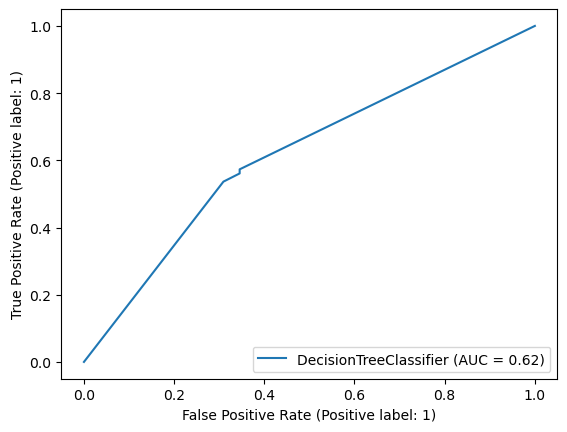

In [71]:
# Alternative: Use ROC curve
RocCurveDisplay.from_estimator(myTree, X_test, y_test) 

In [72]:
# TODO: Using the doc pages above and your trained tree classifier,
#       find the number of features the model was trained on.
print(len(X_train[0]))

5


In [73]:
# TODO: Again, using your trained model and the docs,
#         find the feature importances for all the features.
import numpy as np
feature_importances_ = myTree.feature_importances_
print(f"array{feature_importances_}")

array[0.11393757 0.4143659  0.04884494 0.05325094 0.36960066]


In [74]:
# TODO: Now, repeat your analysis from above (do NOT overwrite your work above).
#       This time, try changing the splitting criterion in your model. Re-run
#         your training, testing, and me. How do your results change, if at all?